<a href="https://colab.research.google.com/github/youngchul-sung/three-minutes-keras/blob/master/ex6_1_ae_fc_mnist_mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

###########################
# AE 모델링
###########################
from tensorflow.keras import layers, models  # (Input, Dense), (Model)
from tensorflow.keras.datasets import mnist
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [0]:
def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)


def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()


def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3523 - accuracy: 0.7570 - val_loss: 0.2702 - val_accuracy: 0.7967
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2620 - accuracy: 0.7982 - val_loss: 0.2499 - val_accuracy: 0.7981
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2398 - accuracy: 0.7976 - val_loss: 0.2276 - val_accuracy: 0.7963
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2205 - accuracy: 0.7974 - val_loss: 0.2108 - val_accuracy: 0.7976
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2057 - accuracy: 0.7986 - val_loss: 0.1980 - val_accuracy: 0.7985
Epoch 6/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1945 - accuracy: 0.7999 - val_loss: 0.1884 - val_accuracy: 0.8004
Epoch 7/10
60000/60000 [======

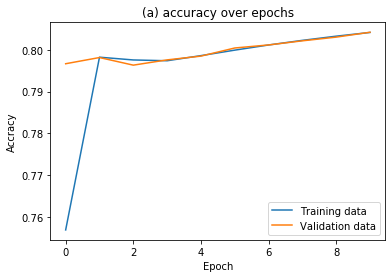

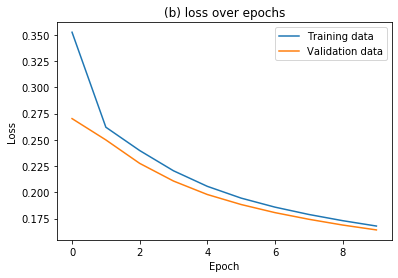

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


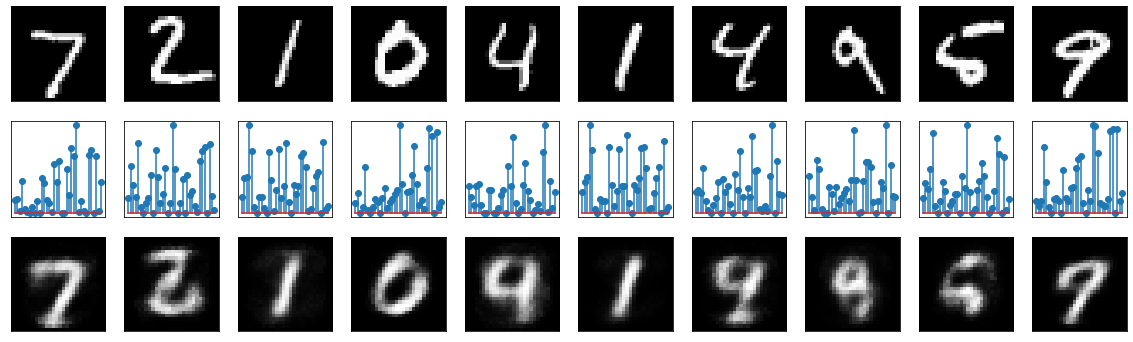

In [3]:
class AE(models.Model):
    def __init__(self, x_nodes=784, z_dim=36):
        x_shape = (x_nodes,)
        x = layers.Input(shape=x_shape)
        z = layers.Dense(z_dim, activation='relu')(x)
        y = layers.Dense(x_nodes, activation='sigmoid')(z)

        super().__init__(x, y)

        self.x = x
        self.z = z
        self.z_dim = z_dim

        # Encoder, Decoder ??

        # default_learning_rate(keras Adadelta) = 1.0
        # default_learning_rate(tf.keras Adadelta) = 0.001
        # It will underfit the model unless you does not give a larger value (lr=1.0)
        self.compile(optimizer=optimizers.Adadelta(learning_rate=1.0), 
                     loss='binary_crossentropy', 
                     metrics=['accuracy'])

    def Encoder(self):
        return models.Model(self.x, self.z)

    def Decoder(self):
        z_shape = (self.z_dim,)
        z = layers.Input(shape=z_shape)
        y_layer = self.layers[-1]
        y = y_layer(z)
        return models.Model(z, y)


###########################
# 데이터 준비
###########################

(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)


###########################
# 학습 효과 분석
###########################



###########################
# AE 동작 확인
###########################
def show_ae(autoencoder):
    encoder = autoencoder.Encoder()
    decoder = autoencoder.Decoder()

    encoded_imgs = encoder.predict(X_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    n = 10
    plt.figure(figsize=(20, 6))
    for i in range(n):

        ax = plt.subplot(3, n, i + 1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.stem(encoded_imgs[i].reshape(-1))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


###########################
# 학습
###########################
def main():
    x_nodes = 784
    z_dim = 36

    autoencoder = AE(x_nodes, z_dim)

    history = autoencoder.fit(X_train, X_train,
                              epochs=10,
                              batch_size=256,
                              shuffle=True,
                              validation_data=(X_test, X_test))

    plot_acc(history, '(a) accuracy over epochs')
    plt.show()
    plot_loss(history, '(b) loss over epochs')
    plt.show()

    show_ae(autoencoder)
    plt.show()


if __name__ == '__main__':
    main()